In [253]:
# Set Up

# common imports
import numpy as np
import sklearn

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Linear Regression

1. Using a direct 'closed-form' equation that directly computes the model parameters that best fit the model to the training set.
2. Using an iterative optimization approach, called Gradient Descent (GD).

Linear Regression model prediction: \
$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$ \
$\hat{y} = h_{\theta}(\bf{x}) = \bf{\Theta} \cdot \bf{x}$ (vector form)

To train a Linear Regression model, you need to find the value of $\Theta$ that minimizes the RMSE. In practice, it is simpler to minimize the Mean Square Error (MSE) than the RMSE, and it leads to the same result.

## The Normal Equation

To find the value of $\Theta$ that minimizes the cost function, there is a closed-form solution. This is called the Normal Equation. \
$\hat\Theta = (\mathbf{X}^T\mathbf{X}^{-1})\mathbf{X}^T \mathbf{y}$

In [254]:
# generate some linear-looking data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

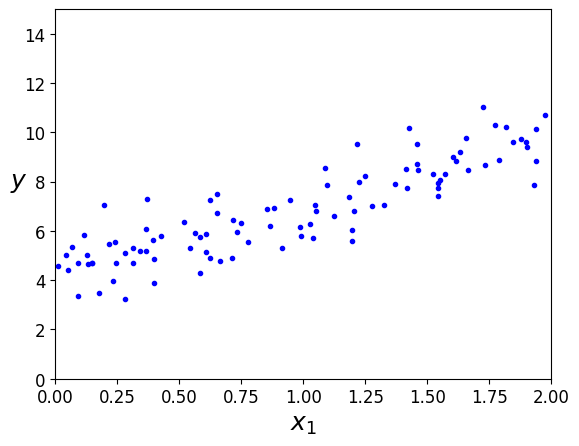

In [255]:
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [256]:
# compute theta hat using the normal equation
X_b = np.c_[np.ones((100,1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [257]:
theta_best

array([[4.21509616],
       [2.77011339]])

The actual function that we used to generate data is $y = 4 + 3 x_1 +$ Gaussian noise, the $\Theta$ we found is close enough.

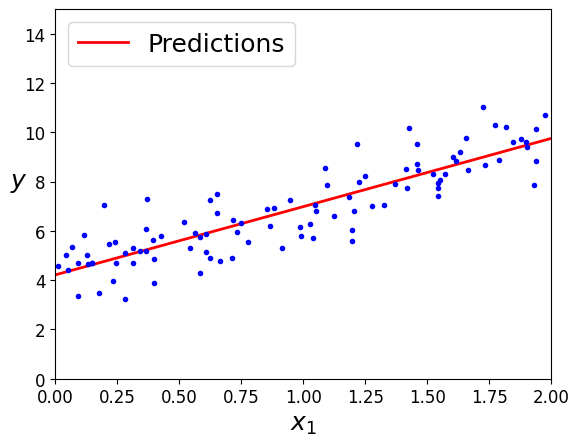

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
plt.plot(X_new, y_predict, 'r-', linewidth=2, label='Predictions')
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.legend(loc='upper left', fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [258]:
# Performing linear regression using sklearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [8]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

## Computational Complexity

The Normal Equation computes the inverse of $\mathbf{X}^T\mathbf{X}$ which is an $(n+1) \times (n+1)$ matrix. The computational complexity of inverting such a matrix is typically about $O(n^{2.4})$ to $O(n^3)$. The SVD (Singular Value Decomposition) approach used by Scikit-Learn's LinearRegression class is about $O(n^2)$.

Both the Normal Equation and the SVD approach get very slow when the number of features grows large (e.g., 100,000). On the positive side, both are linear with regards to the number of instances in the training set (they are $O(m)$), so they handle large training sets efficiently, provided they can fit in memory. Once you have trained your Linear Regression model, predictions are very fast.

# Gradient Descent

Gradient descent is better suited for cases where there are a large number of features, or too many training instances to fit in memory. It measures the local gradient of the error function with regards to the parameter vector $\Theta$, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum.

The size of the steps is called the learning rate, which is a hyperparameter. If the learning rate is too small, then the algorithm will take a long time to converge. If the learning rate is too large, algorithm will jump aross the valley and diverge.

When using Gradient Descent, you should ensure that all features have a similar scale, or else it will take much longer to converge.

## Batch Gradient Descent

To implement Gradient Descent, you need to compute the gradient of the cost function with regards to each model parameter $\theta_j$.

$\nabla_{\Theta} \text{MSE}(\Theta) = \frac{2}{m}\mathbf X^T(\mathbf X \Theta - \mathbf y)$

The formula involves calculations over the full training set $\mathbf X$, at each gradient descent step. This is why the algorithm is called (full) batch gradient descent. As a result it is terribly slow on very large training sets. However, Gradient Descent scales well with the number of features.

$\Theta = \Theta - \eta \nabla_{\Theta} \text{MSE}(\Theta)$, where $\eta$ is the learning rate.

In [9]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialisation

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [10]:
theta

array([[4.21509616],
       [2.77011339]])

This is exactly what the Normal Equation found.

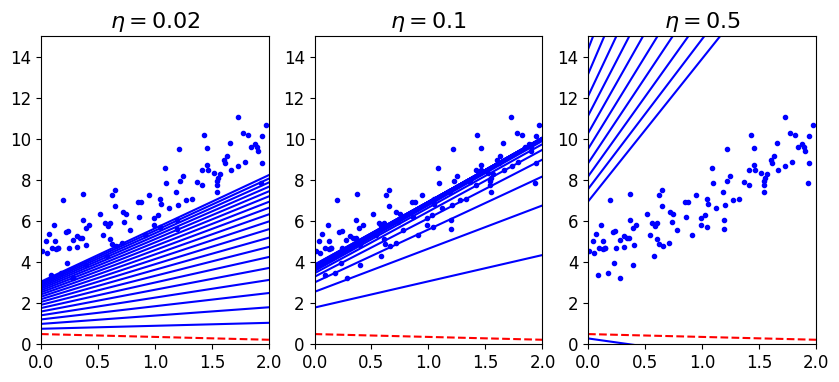

In [16]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, 'b.')
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 20:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if iteration > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.axis([0, 2, 0, 15])
    plt.title(r'$\eta = {}$'.format(eta), fontsize=16)

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

On the left, the learning rate is too low: the algorithm will eventually reach the solution,
but it will take a long time. In the middle, the learning rate looks pretty good: in just a few iterations, it has already converged to the solution. On the right, the learning rate is too high: the algorithm diverges, jumping all over the place and actually getting further and further away from the solution at every step.

## Stochastic Gradient Descent

The main problem with Batch Gradient Descent is that it is very slow when the training set is large. Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance, which makes the algorithm much faster.

On the other hand, due to its stochastic nature, this algorithm is much less regular than Batch Gradient Descent. The cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down. So once the algorithm stops, the final parameter values are good, but not optimal. Randomness is good to escape from local optima, but bad because it means
that the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate. The function that determines the learning rate at each iteration is called the learning schedule.

In [59]:
theta_path_sgd = []
m = len(X_b)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)

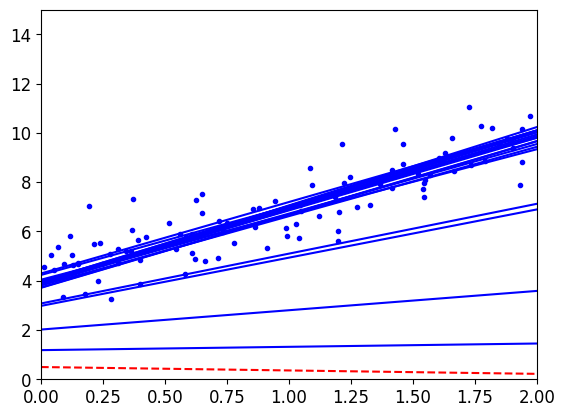

In [60]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = 'b-' if i > 0 else 'r--'         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, 'b.')                                 # not shown
plt.axis([0, 2, 0, 15])                              # not shown
plt.show()                                           # not shown

In [40]:
theta

array([[4.21076011],
       [2.74856079]])

In [49]:
# perform SGD linear regression using sklearn
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [50]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21077682]), array([2.76927873]))

## Mini-batch Gradient Descent

At each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Minibatch GD computes the gradients on small random sets of instances called minibatches.

In [63]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [64]:
theta

array([[4.25214635],
       [2.7896408 ]])

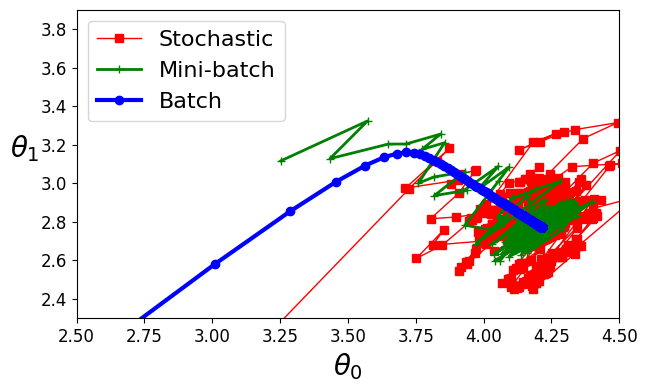

In [69]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], 'r-s', linewidth=1, label='Stochastic')
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], 'g-+', linewidth=2, label='Mini-batch')
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], 'b-o', linewidth=3, label='Batch')
plt.legend(loc='upper left', fontsize=16)
plt.xlabel(r'$\theta_0$', fontsize=20)
plt.ylabel(r'$\theta_1$   ', fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

# Polynomial Regression

You can actually use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression.

In [75]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

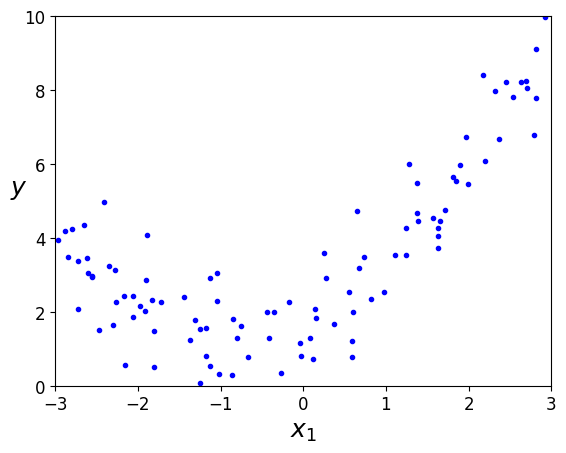

In [76]:
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [77]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [79]:
X_poly[0]

array([-0.75275929,  0.56664654])

X_poly now contains the original feature of X plus the square of this feature. Now you can fit a LinearRegression model to this extended training data.

In [89]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

The model predicts $y = 0.56 x^2 + 0.93x + 1.78$ while the original function was $y = 0.5 x^2 + x + 2$

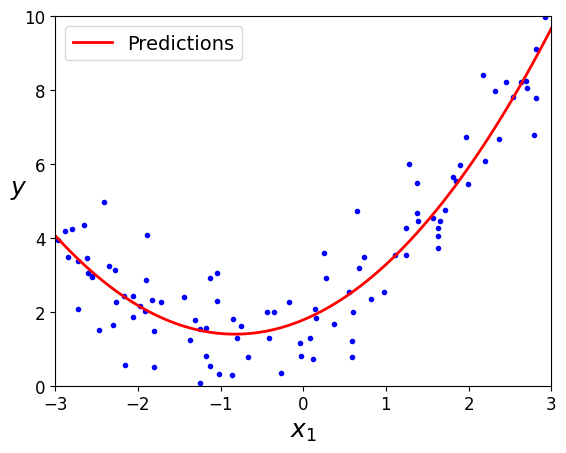

In [88]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Predictions')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.legend(loc='upper left', fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

# Learning Curves

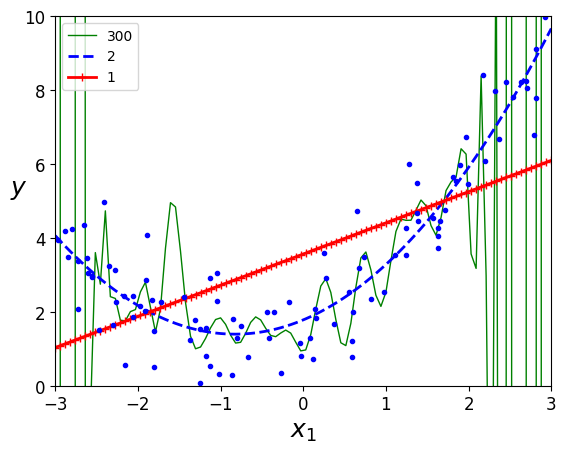

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (('g-', 1, 300), ('b--', 2, 2), ('r-+', 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ('poly_features', polybig_features),
            ('std_scaler', std_scaler),
            ('lin_reg', lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, 'b.', linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

Degree=300, overfitting; degree=1, underfitting.

Learning curves are plots of the model's performance on the training set and the validation set as a function of the training set size.

In [124]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    plt.legend(loc='upper right', fontsize=14)   # not shown in the book
    plt.xlabel('Training set size', fontsize=14) # not shown
    plt.ylabel('RMSE', fontsize=14)              # not shown

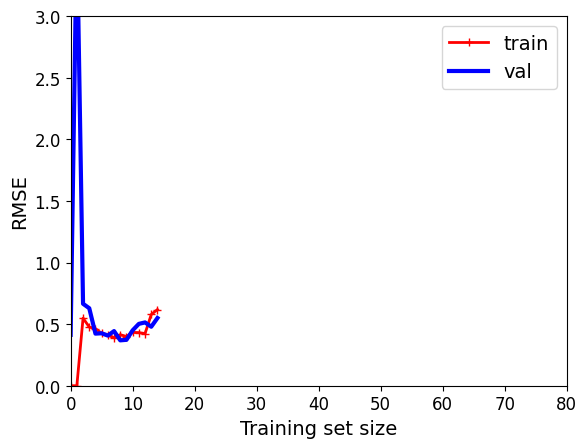

In [125]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                       
plt.show() 

Now let’s look at the learning curves of a 10th-degree polynomial model on the same data.

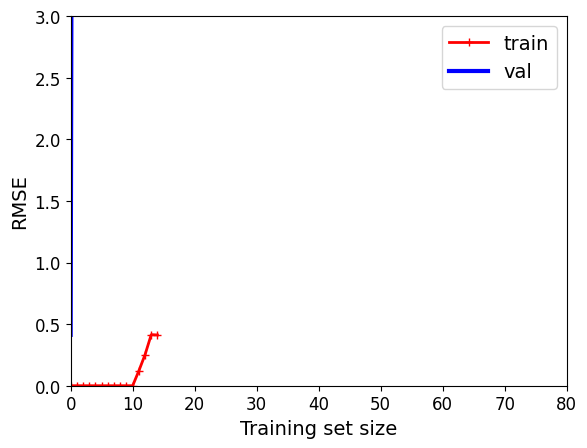

In [121]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
        ('lin_reg', LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

Observation:
1. The error on the training data is much lower than with the Linear Regression model.
2. There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model. However, if you used a much larger training set, the two curves would continue to get closer.

# Regularized Linear Models

A good way to reduce overfitting is to regularize the model (to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data.

For a linear model, regularization is typically achieved by constraining the weights of
the model. We will now look at Ridge Regression, Lasso Regression, and Elastic Net,
which implement three different ways to constrain the weights.

## Ridge Regression

Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear Regression: a regularization term equal to $\alpha \sum_{i=1}^n \theta_i^2$ is added to the cost function. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the bias term $\theta_0$ is not regularized (the sum starts at $i = 1$, not $0$).

Ridge Regression cost function: $J(\Theta) = \text{MSE}(\Theta) + \alpha \frac{1}{2}\sum_{i=1}^n \theta_i^2$ (Q: why have $\frac{1}{2}$ given that we have adjustable $\alpha$?)

Ridge Regression closed-form solution: $\hat \Theta = (\mathbf X^T \mathbf X + \alpha \mathbf A)^{-1} \mathbf X^T \mathbf y$, where $\mathbf A$ is the $(n+1) \times (n+1)$ identity matrix except with a 0 in the top-left cell, corresponding to the bias term.

In [318]:
np.random.seed(42)
alpha = 1
m = 100
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1)
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [319]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=alpha, solver='cholesky', random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.7348211]])

In [320]:
ridge_reg.intercept_, ridge_reg.coef_

(array([1.22122106]), array([[0.34240003]]))

In [285]:
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ('b-', 'g--', 'r:')):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
                    ('std_scaler', StandardScaler()),
                    ('regul_reg', model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r'$\alpha = {}$'.format(alpha))
    plt.plot(X, y, 'b.', linewidth=3)
    plt.legend(loc='upper left', fontsize=15)
    plt.xlabel('$x_1$', fontsize=18)
    plt.axis([0, 3, 0, 4])

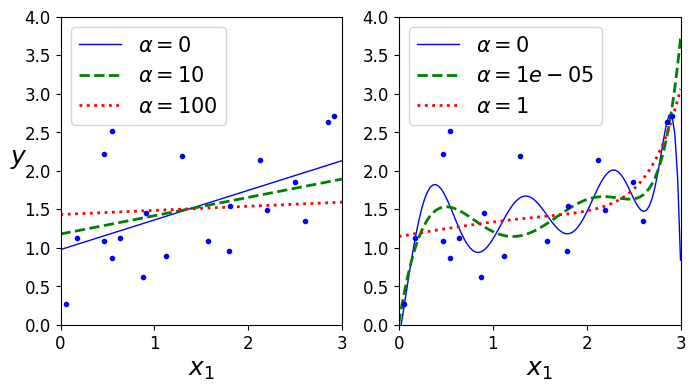

In [286]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

In [295]:
# using stochastic gradient descent, penalty=l2 indicates adding regularization
# equal to half the square of the l2 norm of the weight vector: simply Ridge Regression
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

In [296]:
sgd_reg.intercept_, sgd_reg.coef_

(array([0.53947472]), array([0.62043411]))

In [326]:
# using closed-form solution
X_b = np.c_[np.ones((m, 1)), X]
A = np.ones([2, 2])
A[0,0] = 0
theta_best = np.linalg.inv(X_b.T.dot(X_b) + alpha*A).dot(X_b.T).dot(y)
theta_best

array([[1.23134966],
       [0.33285958]])

# Logistic Regression